---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Applied Machine Learning, Module 1:  A simple classification task

### Import required modules and load data file

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# use to split training set and test set from original data set
# This function randomly shuffles the dataset 
# and splits off a certain percentage of the input samples 
# for use as a training set, 
# and then puts the remaining samples into a different variable 
# for use as a test set. 
from sklearn.model_selection import train_test_split

# read from the txt through panda read_table function
fruits = pd.read_table('fruit_data_with_colors.txt')

In [3]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
zip?
# zip can be used to cmonine two list of data as a new list of tuple
# length will be same with the shorter one
# youcan use zip(*zipped) to unzip the zipped list

In [4]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [10]:
print(fruits.fruit_label.unique())
print(fruits.fruit_name.unique())

[1 2 3 4]
['apple' 'mandarin' 'orange' 'lemon']


In [12]:
len(fruits)

59

In [16]:
fruits.shape

(59, 7)

In [18]:
train_test_split?

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

### Examining the data

In [23]:
# plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']

# 75% training set, 25% test set as default training/test size
# if we want to get the same result
# we just keep the value of random state as the same
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# we use X_train to triain our model
# use X_test to test our model


# print(X_train)

In [30]:
testtype = train_test_split(X, y, random_state=0)
print("length of train test split:", len(testtype))
print("The shape of training data",X_train.shape)
print("The shape of test data",X_test.shape)

length of train test split: 4
The shape of training data (44, 4)
The shape of test data (15, 4)


In [56]:
# using feature pair plot?
# show all possible pairs of features
# produce a scatter plot for each pair
# show how the features are correlated to each other or not
cmap = cm.get_cmap('gnuplot')
type(cmap)

<IPython.core.display.Javascript object>


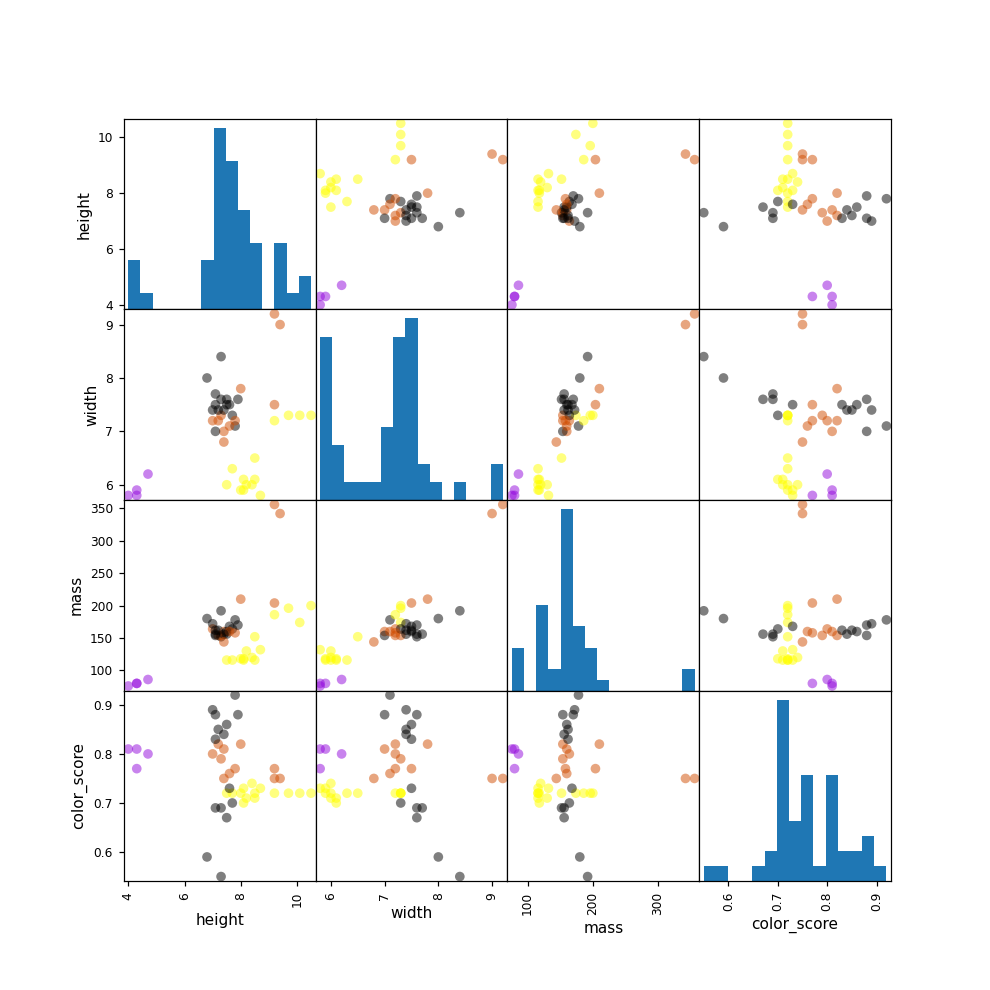

In [57]:
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c=y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

<IPython.core.display.Javascript object>


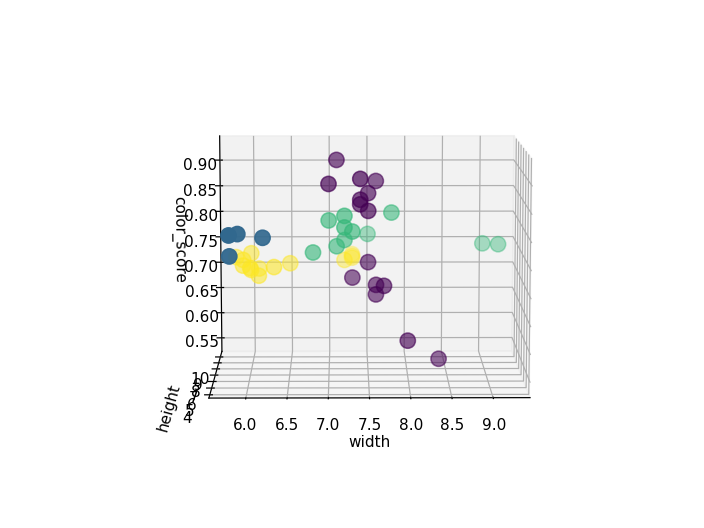

In [33]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create train-test split

In [5]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']
print(y.unique())

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

[1 2 3 4]


### Create classifier object

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

### Train the classifier (fit the estimator) using the training data

In [7]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Estimate the accuracy of the classifier on future data, using the test data

In [8]:
knn.score(X_test, y_test)

0.5333333333333333

### Use the trained k-NN classifier model to classify new, previously unseen objects

In [9]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
print(fruit_prediction)
lookup_fruit_name[fruit_prediction[0]]

[2]


'mandarin'

In [10]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### Plot the decision boundaries of the k-NN classifier

<IPython.core.display.Javascript object>


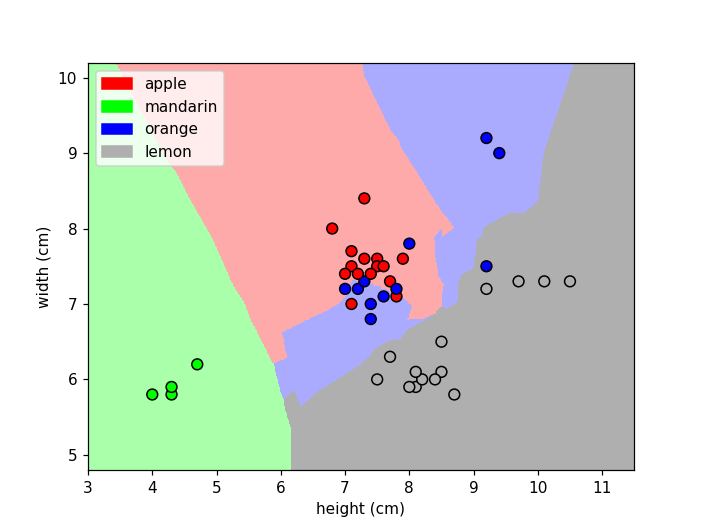

In [11]:
from adspy_shared_utilities import plot_fruit_knn

# 'unifrm is the waiting method to be used'
# passing the string uniform, which means to treat all neighbours equally 
# when combining their labels
plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

<IPython.core.display.Javascript object>


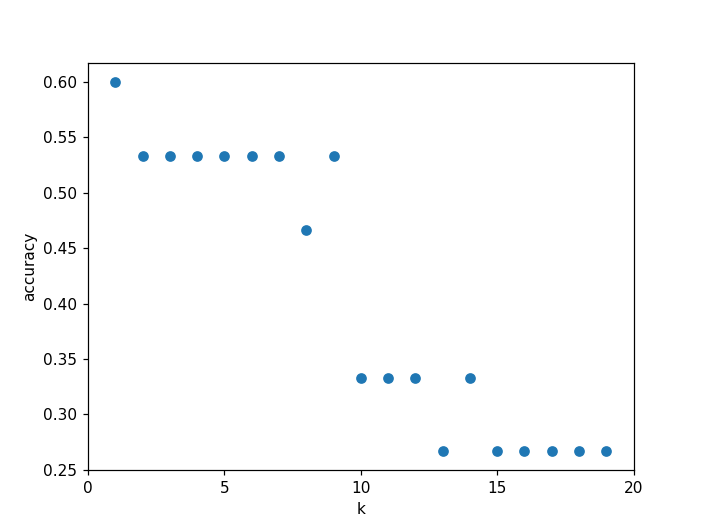

In [15]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

<IPython.core.display.Javascript object>


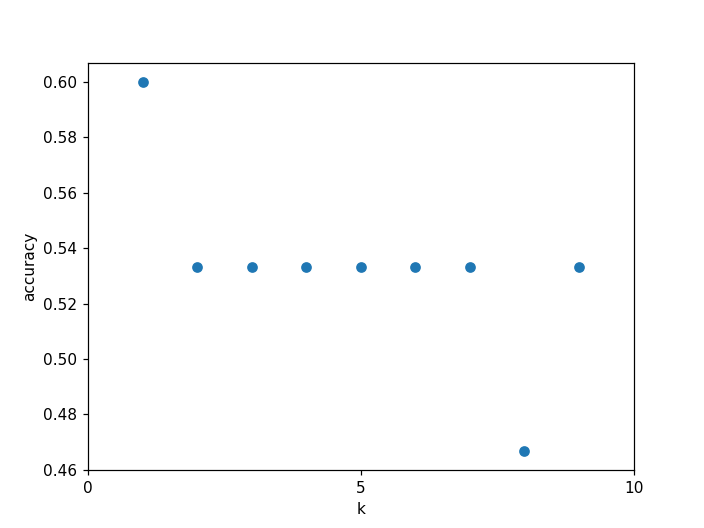

In [17]:
k_range = range(1,10)
scores = []

for k in k_range:
    # define a knn model with k number as K
    knn = KNeighborsClassifier(n_neighbors = k)
    # fit the model with training data set
    knn.fit(X_train, y_train)
    # score the model with test data set
    scores.append(knn.score(X_test, y_test))

# show the data set
plt.figure()
# define x label
plt.xlabel('k')
# define y lable
plt.ylabel('accuracy')
# assign x, y axis data
plt.scatter(k_range, scores)
# assign the distance of x axis
plt.xticks([0,5,10]);

### How sensitive is k-NN classification accuracy to the train/test split proportion?

<IPython.core.display.Javascript object>


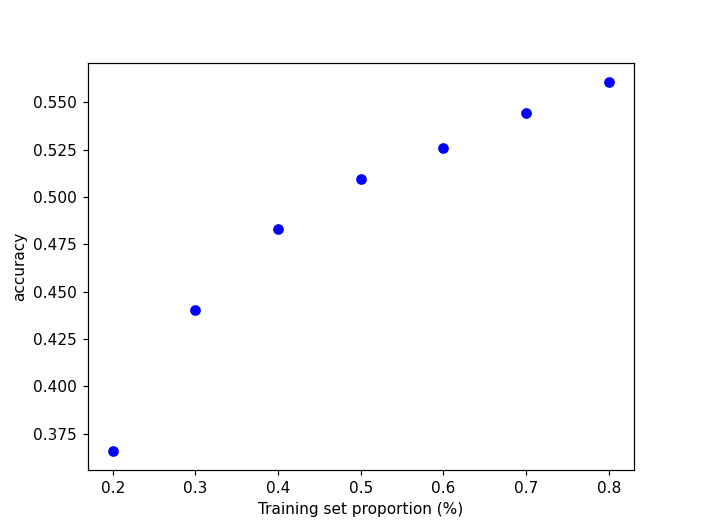

In [18]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

<IPython.core.display.Javascript object>


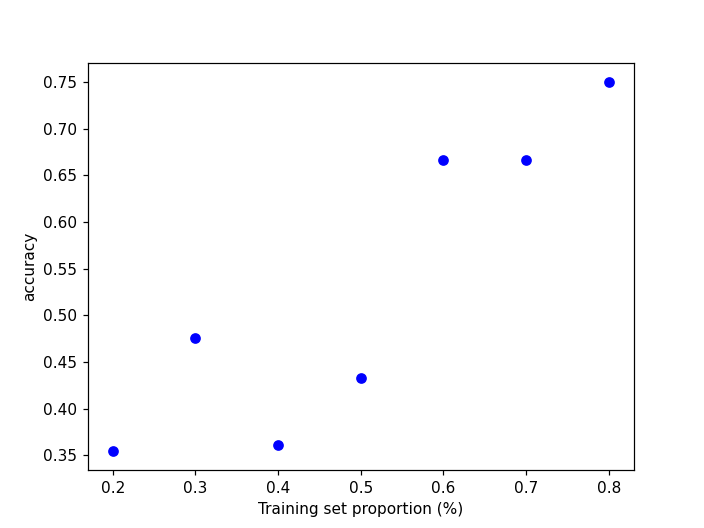

In [24]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

# defin a knn model, no need change nerighbor k number
knn = KNeighborsClassifier(n_neighbors = 5)

# start plot
plt.figure()

# loop each percentage
for s in t:

    scores = []
    # for each test percentage, do training for 1000 times
    # and get the mean value of scores
    for i in range(1,2):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');